In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mloey1/ahcd1")

*italicised text*{"username":"moemen100","key":"*052447a3b1d12ea1dbbf0bfdf46c276c*"}

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mloey1/ahdd1")

# Import libraries necessary for this project

In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import cv2
from PIL import Image

# uploaded dataset files

Loading Arabic Letters Dataset

In [3]:
ls

ahcd1/  ahdd1/  sample_data/


In [4]:

x_train = pd.read_csv("./ahcd1/csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv("./ahcd1/csvTrainLabel 13440x1.csv",header=None)
x_test_val = pd.read_csv("./ahcd1/csvTestImages 3360x1024.csv",header=None)
y_test_val= pd.read_csv("./ahcd1/csvTestLabel 3360x1.csv",header=None)



In [5]:
x_train = x_train.iloc[:,:].values
x_test_val = x_test_val.iloc[:,:].values
y_train = y_train.iloc[:,:].values
y_test_val = y_test_val.iloc[:,:].values

In [6]:
x_train = x_train.reshape(x_train.shape[0],32,32)
x_test_val = x_test_val.reshape(x_test_val.shape[0],32,32)

In [7]:
x_train_temp = np.zeros((x_train.shape[0],32,32))
x_test_val_temp = np.zeros((x_test_val.shape[0],32,32))

In [8]:
for i in range(x_train.shape[0]):
    #x_train_temp[i] = cv2.resize(x_train[i].astype(float), (28, 28))
    x_train_temp[i] = np.transpose(x_train[i])
for i in range(x_test_val.shape[0]):
    #x_test_val_temp[i] = cv2.resize(x_test_val[i].astype(float), (28, 28))
    x_test_val_temp[i] = np.transpose(x_test_val[i])


In [9]:
x_train = x_train_temp
x_test_val = x_test_val_temp

In [10]:
y_test = np.array([])
x_test=np.array([])
y_val=np.array([])
x_val=np.array([])

In [11]:
randomize = np.arange(len(y_test_val))
np.random.shuffle(randomize)
x_test_val = x_test_val[randomize]
y_test_val = y_test_val[randomize]

In [12]:
for i in range(28):
  labels = np.where(y_test_val==i+1)[0]
  if(len(y_test) == 0):
    y_test = y_test_val[labels[:60]]
    x_test = x_test_val[labels[:60]]
    y_val = y_test_val[labels[60:]]
    x_val = x_test_val[labels[60:]]
  else:
    y_test = np.concatenate((y_test,y_test_val[labels[:60]]))
    x_test = np.concatenate((x_test,x_test_val[labels[:60]]))
    y_val = np.concatenate((y_val,y_test_val[labels[60:]]))
    x_val = np.concatenate((x_val,x_test_val[labels[60:]]))

x_test_val=[]
y_test_val=[]

In [13]:
train_len = y_train.shape[0]
val_len = y_val.shape[0]

In [14]:
for i in range(10):
  y_train = np.concatenate((y_train,y_train[0:train_len]))
  x_train = np.concatenate((x_train,x_train[0:train_len]))
  y_val = np.concatenate((y_val,y_val[0:val_len]))
  x_val = np.concatenate((x_val,x_val[0:val_len]))

Loading Arabic Digits Dataset

In [15]:
x_train_val_digits = pd.read_csv("./ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv")
y_train_val_digits = pd.read_csv("./ahdd1/csvTrainLabel 60k x 1.csv")
x_test_digits = pd.read_csv("./ahdd1/csvTestImages 10k x 784.csv")
y_test_digits = pd.read_csv("./ahdd1/csvTestLabel 10k x 1.csv")

In [16]:
print(x_train_val_digits.shape)
print(y_train_val_digits.shape)
print(x_test_digits.shape)
print(y_test_digits.shape)

(59999, 784)
(59999, 1)
(9999, 784)
(9999, 1)


In [17]:
x_train_val_digits = x_train_val_digits.iloc[:,:].values
x_test_digits = x_test_digits.iloc[:,:].values
y_train_val_digits = y_train_val_digits.iloc[:,:].values
y_test_digits = y_test_digits.iloc[:,:].values

In [18]:
x_train_val_digits = x_train_val_digits.reshape(x_train_val_digits.shape[0],28,28)
x_test_digits = x_test_digits.reshape(x_test_digits.shape[0],28,28)

In [19]:
temp_x_train_val_digits = np.zeros((x_train_val_digits.shape[0], 32, 32))
for i in range(x_train_val_digits.shape[0]):
    temp_x_train_val_digits[i] = cv2.copyMakeBorder(x_train_val_digits[i],
                                                    2, 2, 2, 2,
                                                    cv2.BORDER_CONSTANT,
                                                    value=0)
    temp_x_train_val_digits[i]= np.transpose(temp_x_train_val_digits[i])

temp_x_test_digits = np.zeros((x_test_digits.shape[0], 32, 32))
for i in range(x_test_digits.shape[0]):
    temp_x_test_digits[i] = cv2.copyMakeBorder(x_test_digits[i],
                                                    2, 2, 2, 2,
                                                    cv2.BORDER_CONSTANT,
                                                    value=0)
    temp_x_test_digits[i] = np.transpose(temp_x_test_digits[i])

x_test_digits = temp_x_test_digits
x_train_val_digits = temp_x_train_val_digits

In [20]:
x_train_val_digits.shape

(59999, 32, 32)

In [21]:
dcount = {}
for ele in y_train_val_digits[:,0]:
  if(ele not in dcount):
    dcount[ele]=0
  dcount[ele]= dcount[ele]+1
for key, value in dcount.items() :
  print(key ,":",value)

1 : 6000
2 : 6000
3 : 6000
4 : 6000
5 : 6000
6 : 6000
7 : 6000
8 : 6000
9 : 6000
0 : 5999


In [22]:
y_train_digits = np.array([])
x_train_digits=np.array([])
y_val_digits=np.array([])
x_val_digits=np.array([])

In [23]:
randomize = np.arange(len(y_train_val_digits))
np.random.shuffle(randomize)
x_train_val_digits = x_train_val_digits[randomize]
y_train_val_digits = y_train_val_digits[randomize]

In [24]:
for i in range(10):
  labels = np.where(y_train_val_digits==i)[0]
  if(len(y_train_digits) == 0):
    y_val_digits = y_train_val_digits[labels[:700]]
    x_val_digits = x_train_val_digits[labels[:700]]
    y_train_digits = y_train_val_digits[labels[700:]]
    x_train_digits = x_train_val_digits[labels[700:]]
  else:
    y_val_digits = np.concatenate((y_val_digits,y_train_val_digits[labels[:700]]))
    x_val_digits = np.concatenate((x_val_digits,x_train_val_digits[labels[:700]]))
    y_train_digits = np.concatenate((y_train_digits,y_train_val_digits[labels[700:]]))
    x_train_digits = np.concatenate((x_train_digits,x_train_val_digits[labels[700:]]))

y_train_val_digits=[]
x_train_val_digits=[]

In [25]:
for i in range(y_train_digits.shape[0]):
    y_train_digits[i] = y_train_digits[i] + 29

for i in range(y_val_digits.shape[0]):
    y_val_digits[i] = y_val_digits[i] + 29

for i in range(y_test_digits.shape[0]):
    y_test_digits[i] = y_test_digits[i] + 29

In [26]:
x_train = np.concatenate((x_train,x_train_digits))
y_train = np.concatenate((y_train,y_train_digits))
x_test = np.concatenate((x_test,x_test_digits))
y_test = np.concatenate((y_test,y_test_digits))
x_val = np.concatenate((x_val,x_val_digits))
y_val = np.concatenate((y_val,y_val_digits))

In [27]:
randomize = np.arange(len(y_test))
np.random.shuffle(randomize)
x_test = x_test[randomize]
y_test = y_test[randomize]

In [28]:
randomize = np.arange(len(y_val))
np.random.shuffle(randomize)
x_val = x_val[randomize]
y_val = y_val[randomize]

In [29]:
randomize = np.arange(len(y_train))
np.random.shuffle(randomize)
x_train = x_train[randomize]
y_train = y_train[randomize]

In [30]:
dcount = {}
for ele in y_train[:,0]:
  if(ele not in dcount):
    dcount[ele]=0
  dcount[ele]= dcount[ele]+1
for i in range(38) :
  print(str(i+1)  + " : " + str(dcount[i+1]))

1 : 5280
2 : 5280
3 : 5280
4 : 5280
5 : 5280
6 : 5280
7 : 5280
8 : 5280
9 : 5280
10 : 5280
11 : 5280
12 : 5280
13 : 5280
14 : 5280
15 : 5280
16 : 5280
17 : 5280
18 : 5280
19 : 5280
20 : 5280
21 : 5280
22 : 5280
23 : 5280
24 : 5280
25 : 5280
26 : 5280
27 : 5280
28 : 5280
29 : 5299
30 : 5300
31 : 5300
32 : 5300
33 : 5300
34 : 5300
35 : 5300
36 : 5300
37 : 5300
38 : 5300


In [31]:
y_train.shape

(200839, 1)

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<Axes: ylabel='count'>

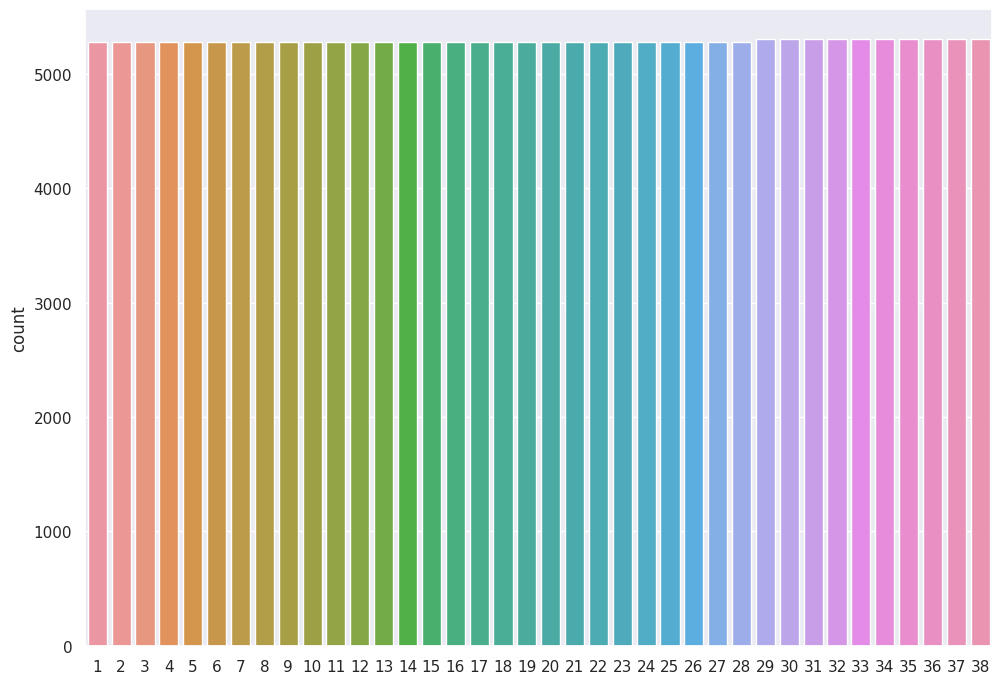

In [33]:
sns.countplot(x=y_train[:,0])

In [34]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [35]:
y_train = y_train-1
y_test = y_test-1
y_val = y_val-1

In [36]:
total_classes = len(np.unique(y_train))

In [37]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [38]:
y_train = to_categorical(y_train,total_classes)
y_test = to_categorical(y_test, total_classes)
y_val = to_categorical(y_val, total_classes)

In [39]:
print("Training x size:",x_train.shape)
print("Testing x size:",x_test.shape)
print("val x size:",x_val.shape)
print("Training y size:",y_train.shape)
print("Testing y size:",y_test.shape)
print("val y size:",y_val.shape)

Training x size: (200839, 32, 32)
Testing x size: (11679, 32, 32)
val x size: (25480, 32, 32)
Training y size: (200839, 38)
Testing y size: (11679, 38)
val y size: (25480, 38)


In [61]:
x_train = x_train.reshape([-1, 32, 32, 1])
x_test = x_test.reshape([-1, 32, 32, 1])
x_val = x_val.reshape([-1, 32, 32, 1])

In [40]:
both_classes = {0: 'ا', 1: 'ب', 2: 'ت', 3: 'ث', 4: 'ج', 5: 'ح', 6: 'خ', 7: 'د', 8: 'ذ', 9: 'ر',
                  10: 'ز',11: 'س', 12: 'ش', 13: 'ص', 14: 'ض', 15: 'ط', 16: 'ظ',17: 'ع', 18: 'غ',
                  19: 'ف', 20: 'ق', 21: 'ك', 22: 'ل',23: 'م', 24: 'ن', 25: 'ه', 26: 'و', 27: 'ى',
                  28:'0',29:'1',30:'2',31:'3',32:'4',33:'5',34:'6',35:'7',36:'8',37:'9'}

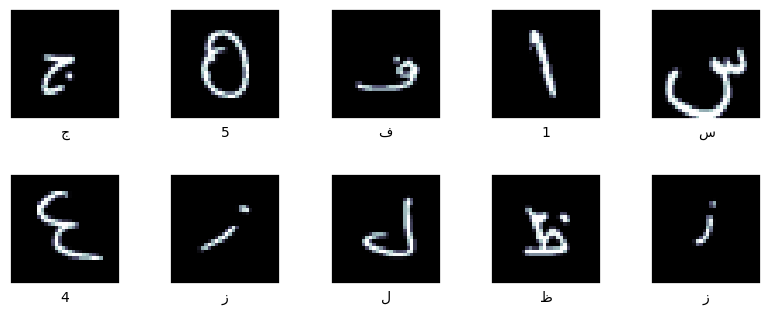

In [62]:
ra = np.random.randint(0, x_train.shape[0], size=25)
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]],cmap='bone')
    plt.xlabel(both_classes[int(np.where(y_train[ra[i]]==1)[0])], fontsize=10, color='black', ha='center')
    plt.subplots_adjust(hspace=0.5)
plt.show()

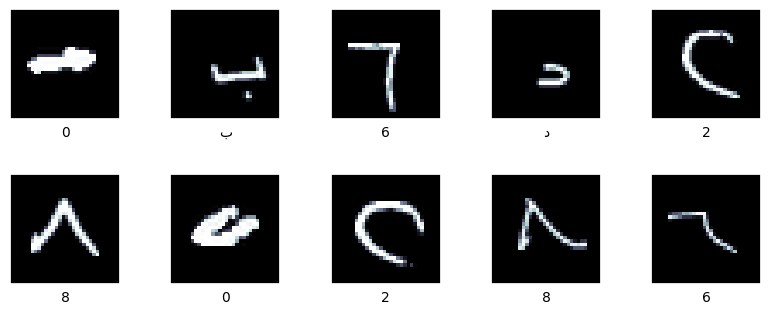

In [42]:
  ra = np.random.randint(0, 1680, size=25)
  plt.figure(figsize=(10, 10))
  for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[ra[i]],cmap='bone')
    plt.xlabel(both_classes[int(np.where(y_test[ra[i]]==1)[0])], fontsize=10, color='black')
    plt.subplots_adjust(hspace=0.5)
  plt.show()

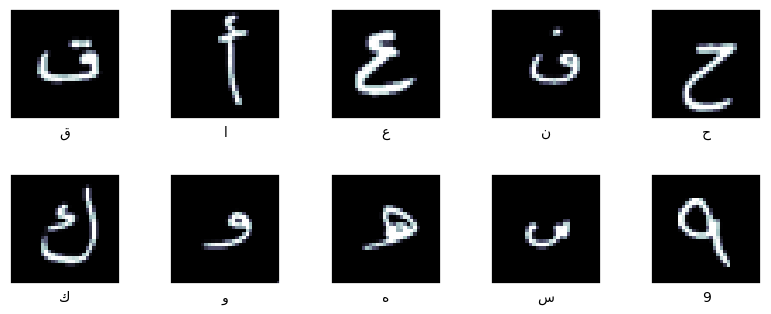

In [47]:
  ra = np.random.randint(0, x_val.shape[0], size=25)
  plt.figure(figsize=(10, 10))
  for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_val[ra[i]],cmap='bone')
    plt.xlabel(both_classes[int(np.where(y_val[ra[i]]==1)[0])], fontsize=10, color='black', ha='center')
    plt.subplots_adjust(hspace=0.5)
  plt.show()

# Designing Model Architecture

In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

In [63]:

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(32, 32, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())

  #Fully connected final layer

  model.add(Dense(256, activation='relu'),)
  model.add(Dense(38, activation='softmax'))


  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model



# Model Summary

In [56]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_9 (Batc  (None, 16, 16, 32)      

## plot the model and save it to a file also





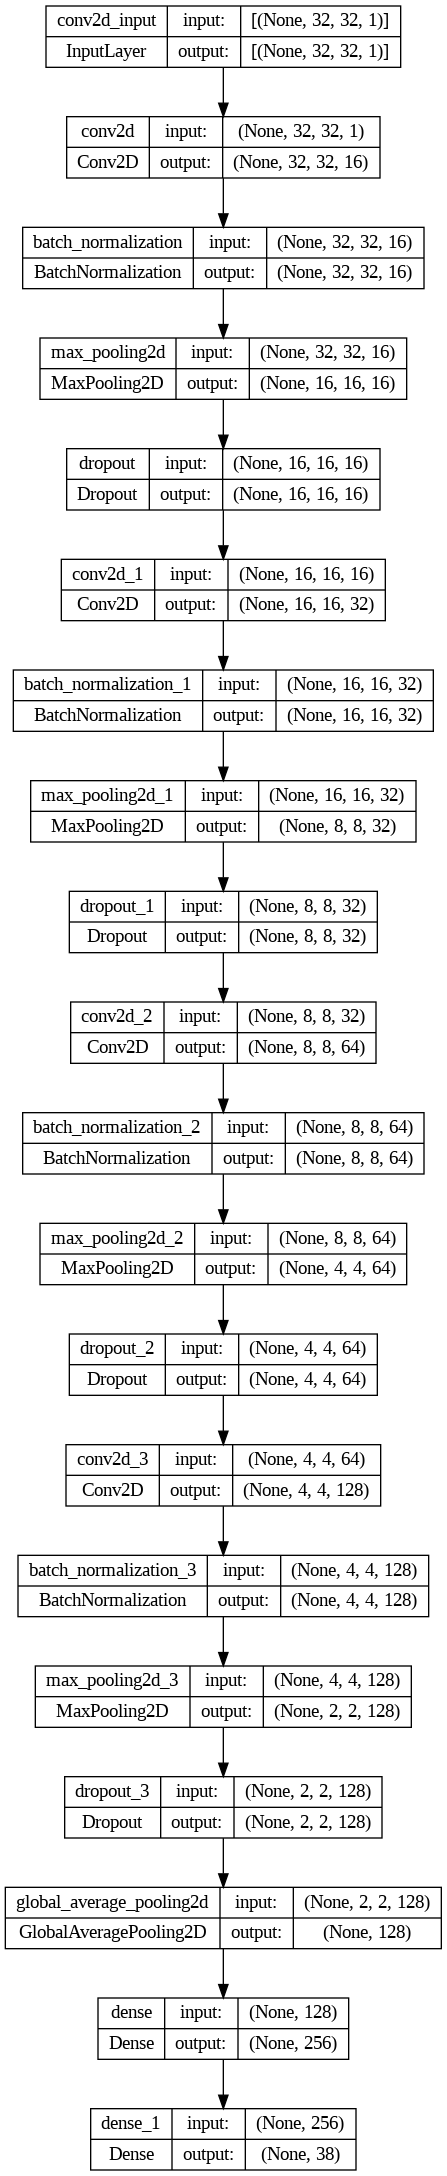

In [51]:
from keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))



From the above results we can see that best parameters are:

    Optimizer: Adam
    Kernel_initializer: uniform
    Activation: relu



In [64]:
image_generator = ImageDataGenerator(rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                      zoom_range = 0.1, # Randomly zoom image
                                      width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                      height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                    )
image_generator.fit(x_train)

val_image_generator = ImageDataGenerator( rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                          zoom_range = 0.1, # Randomly zoom image
                                          width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                          height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                        )
val_image_generator.fit(x_val)

In [65]:
filepath="./train/both-bigger-aug-weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=15,
                               verbose=0,
                               mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta=1e-4,patience=5, min_lr=0.0)

callbacks_list = [early_stopping, checkpoint, reduce_lr]

**Trying 100 epochs instead of 30 with early stoping pattience 15 epochs**


In [66]:
model = create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu')
from keras.callbacks import ModelCheckpoint

batch_size = 128
#trying 100 epochs instead of 30 with early stoping pattience 15 epochs
history = model.fit(image_generator.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0]/batch_size,
                    epochs=100,
                    verbose=1,
                    callbacks=callbacks_list,
                    validation_data=val_image_generator.flow(x_val, y_val, batch_size=batch_size),
                    validation_steps=x_val.shape[0]/batch_size)


Epoch 1/100
1569/1569 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.8302
Epoch 1: val_accuracy improved from -inf to 0.80714, saving model to ./train/both-bigger-aug-weights-improvement-01-0.81.hdf5
1569/1569 [==============================] - 93s 57ms/step - loss: 0.5315 - accuracy: 0.8303 - val_loss: 0.6243 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 2/100
1569/1569 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.9294
Epoch 2: val_accuracy did not improve from 0.80714
1569/1569 [==============================] - 76s 48ms/step - loss: 0.2153 - accuracy: 0.9294 - val_loss: 4.1187 - val_accuracy: 0.2274 - lr: 0.0010
Epoch 3/100
1570/1569 [==============================] - ETA: 0s - loss: 0.1780 - accuracy: 0.9409
Epoch 3: val_accuracy improved from 0.80714 to 0.84482, saving model to ./train/both-bigger-aug-weights-improvement-03-0.84.hdf5
1569/1569 [==============================] - 75s 48ms/step - loss: 0.1780 - accuracy: 0.9409 - val_lo

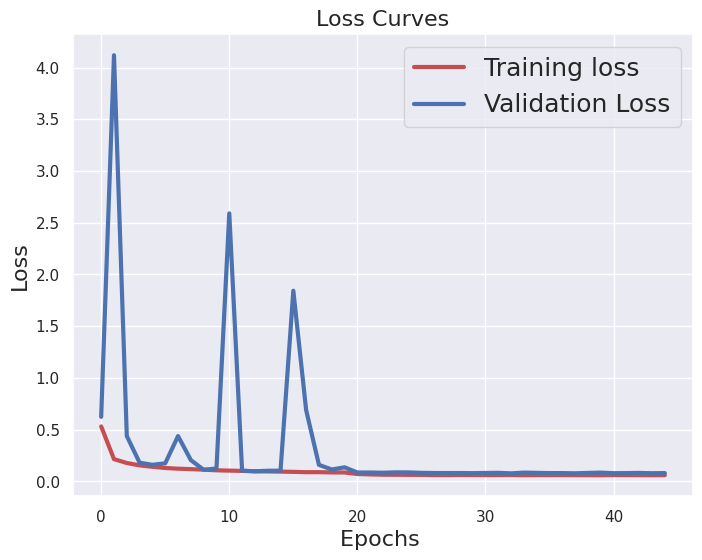

In [67]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
  # Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

plot_loss_accuracy(history)




## Load And Evaluate Model Saved At poch 30

In [69]:
model.load_weights("./train/both-bigger-aug-weights-improvement-30-0.98.hdf5")


In [70]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

365/365 [==============================] - 2s 5ms/step - loss: 0.0334 - accuracy: 0.9904
Test Accuracy: 0.9904101490974426
Test Loss: 0.03338303044438362


In [71]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [72]:
prdicted_labels_model = model.predict(x_test)

365/365 [==============================] - 2s 4ms/step


In [73]:
predicted_max_prob_model = np.argmax(prdicted_labels_model, axis=1)
real_labels_index_model = np.argmax(y_test, axis=1)

## Clases and ids

In [74]:
for key in both_classes.keys():
    print(str(key) + " ==> " + both_classes[key])

0 ==> ا
1 ==> ب
2 ==> ت
3 ==> ث
4 ==> ج
5 ==> ح
6 ==> خ
7 ==> د
8 ==> ذ
9 ==> ر
10 ==> ز
11 ==> س
12 ==> ش
13 ==> ص
14 ==> ض
15 ==> ط
16 ==> ظ
17 ==> ع
18 ==> غ
19 ==> ف
20 ==> ق
21 ==> ك
22 ==> ل
23 ==> م
24 ==> ن
25 ==> ه
26 ==> و
27 ==> ى
28 ==> 0
29 ==> 1
30 ==> 2
31 ==> 3
32 ==> 4
33 ==> 5
34 ==> 6
35 ==> 7
36 ==> 8
37 ==> 9


## Print classification report

In [76]:
from sklearn.metrics import classification_report
print(classification_report(real_labels_index_model, predicted_max_prob_model))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       0.87      0.97      0.91        60
           3       0.97      0.95      0.96        60
           4       1.00      1.00      1.00        60
           5       0.98      1.00      0.99        60
           6       0.98      1.00      0.99        60
           7       0.97      0.95      0.96        60
           8       0.98      0.97      0.97        60
           9       0.95      0.98      0.97        60
          10       0.98      0.98      0.98        60
          11       1.00      1.00      1.00        60
          12       1.00      1.00      1.00        60
          13       0.97      1.00      0.98        60
          14       1.00      0.97      0.98        60
          15       0.95      1.00      0.98        60
          16       1.00      0.95      0.97        60
          17       0.95    

## Print cofusion matrix

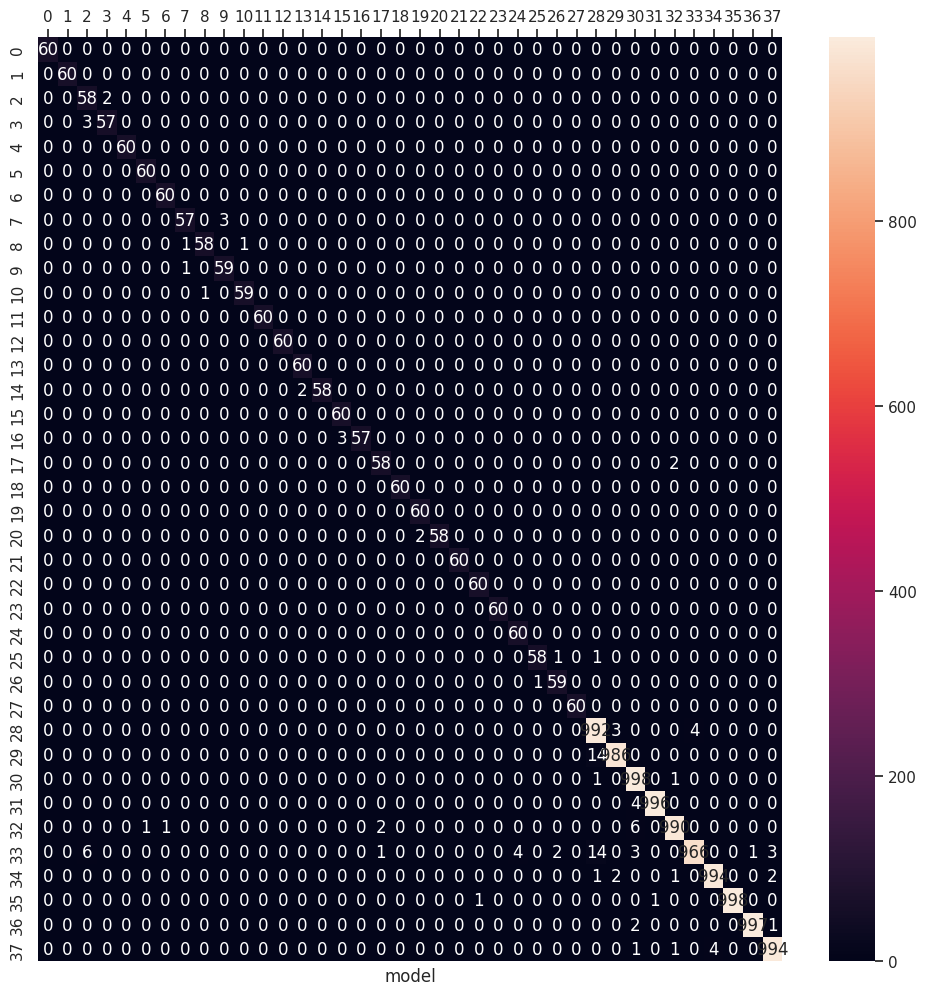

In [79]:
cm = confusion_matrix(real_labels_index_model, predicted_max_prob_model)
plt.figure(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt="d")
ax.set(xlabel="model")
ax.xaxis.tick_top()

## Print the miss-classified images

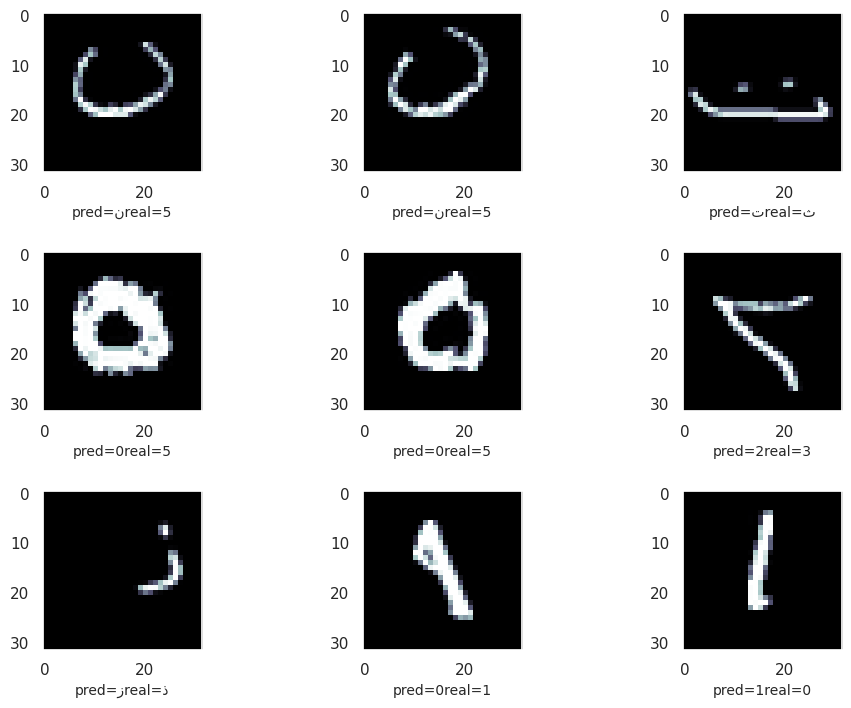

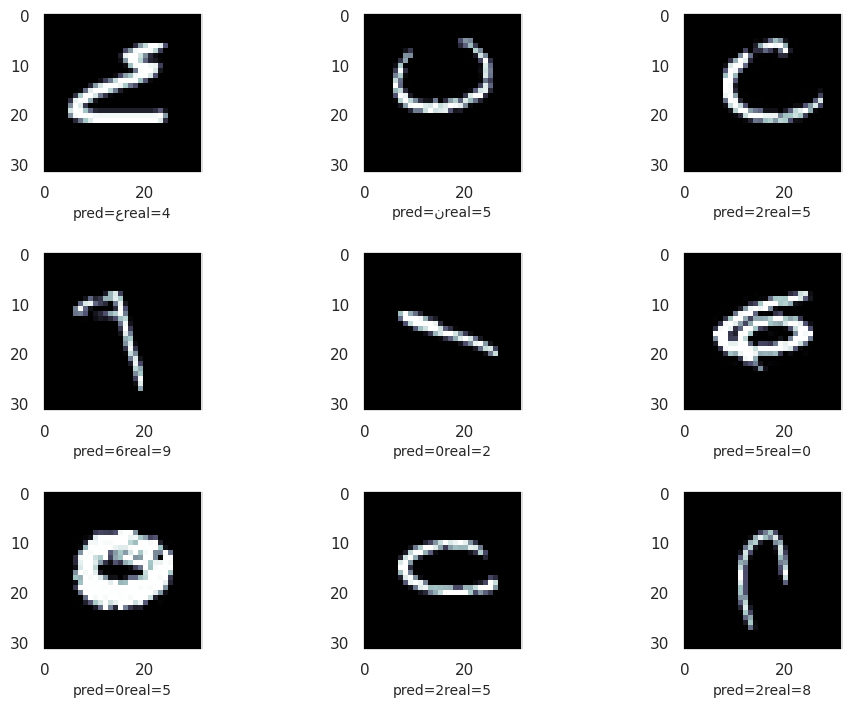

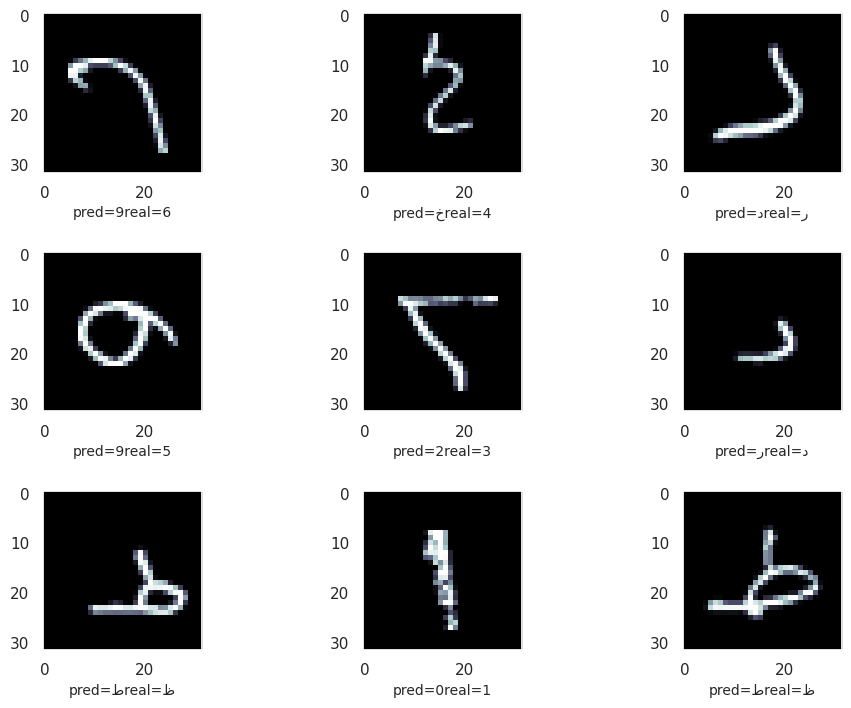

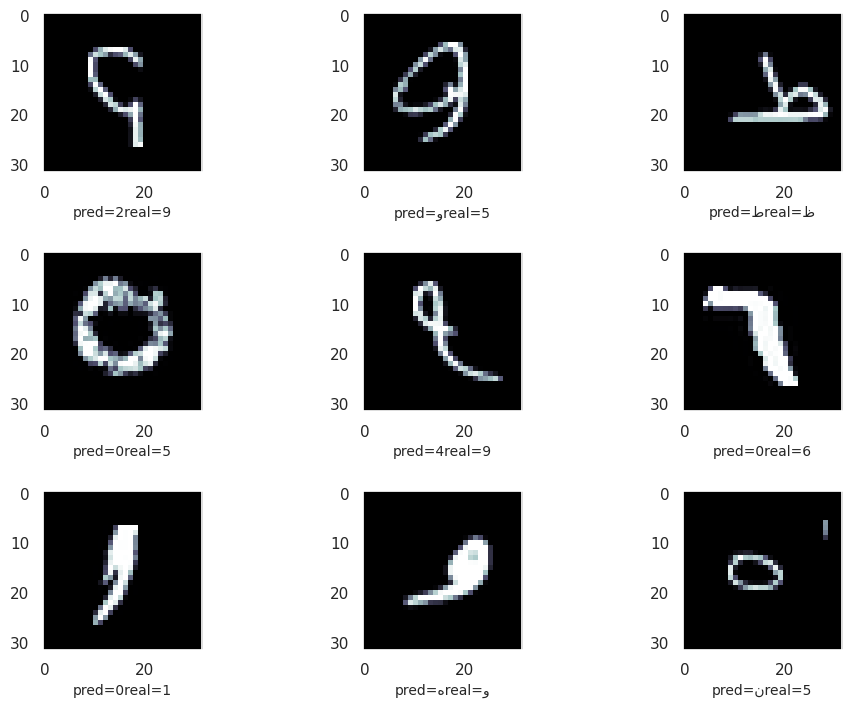

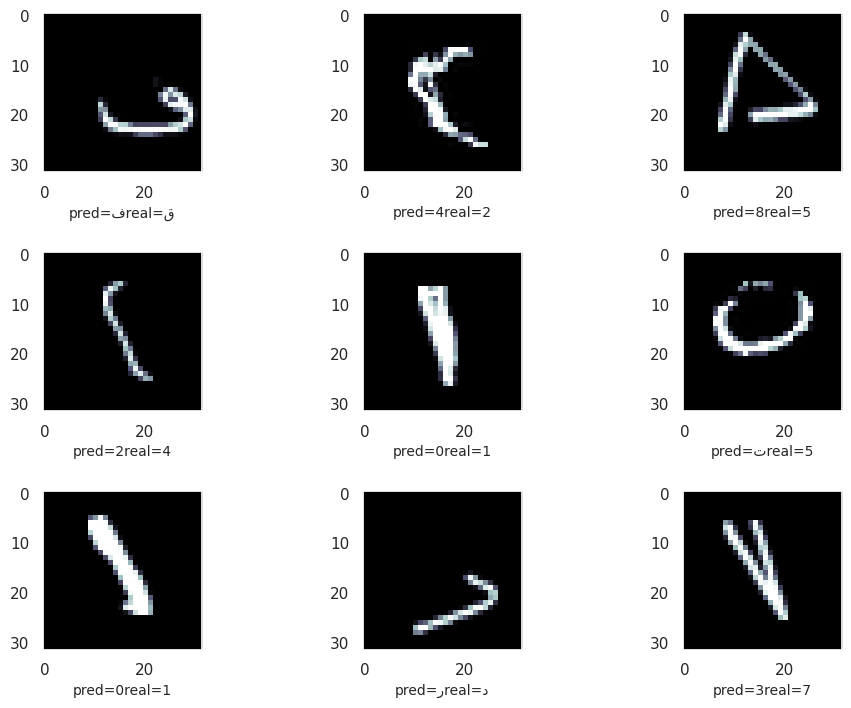

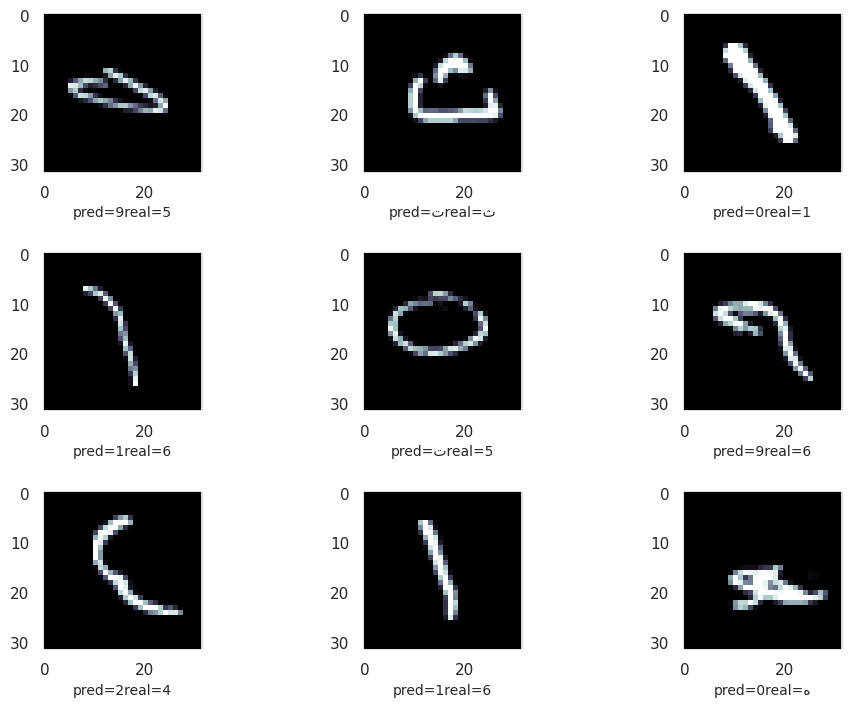

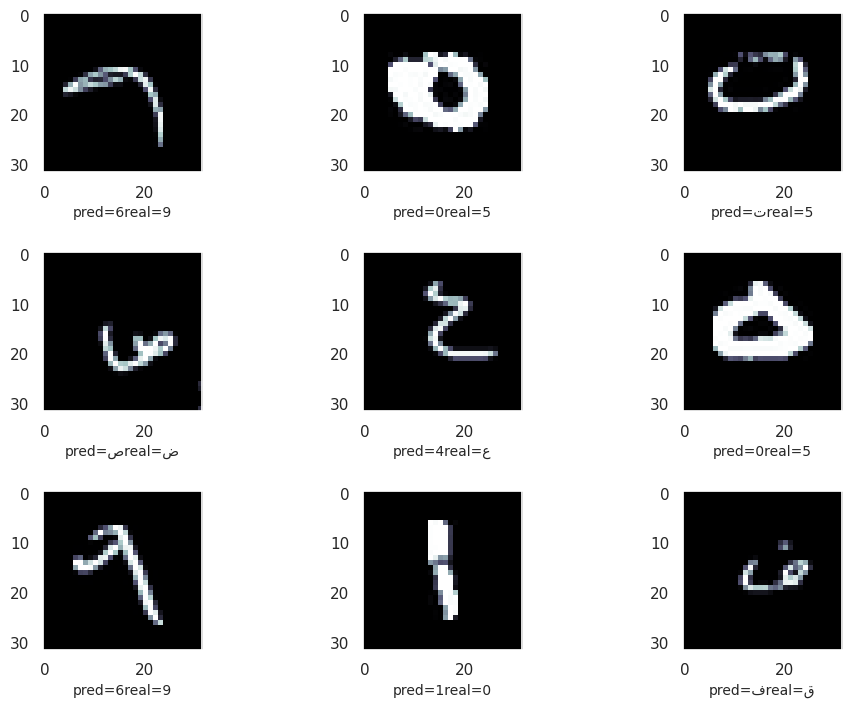

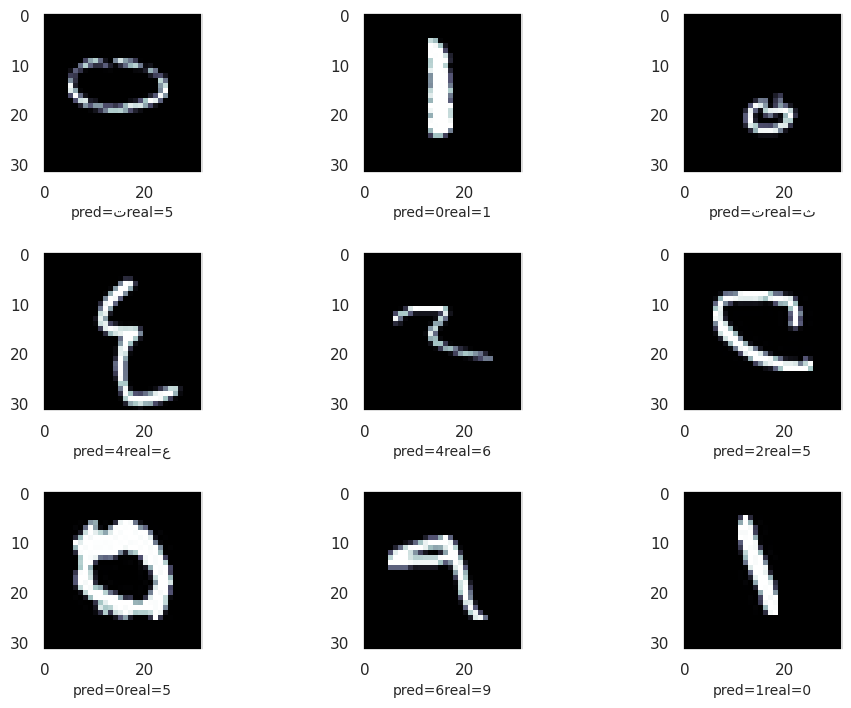

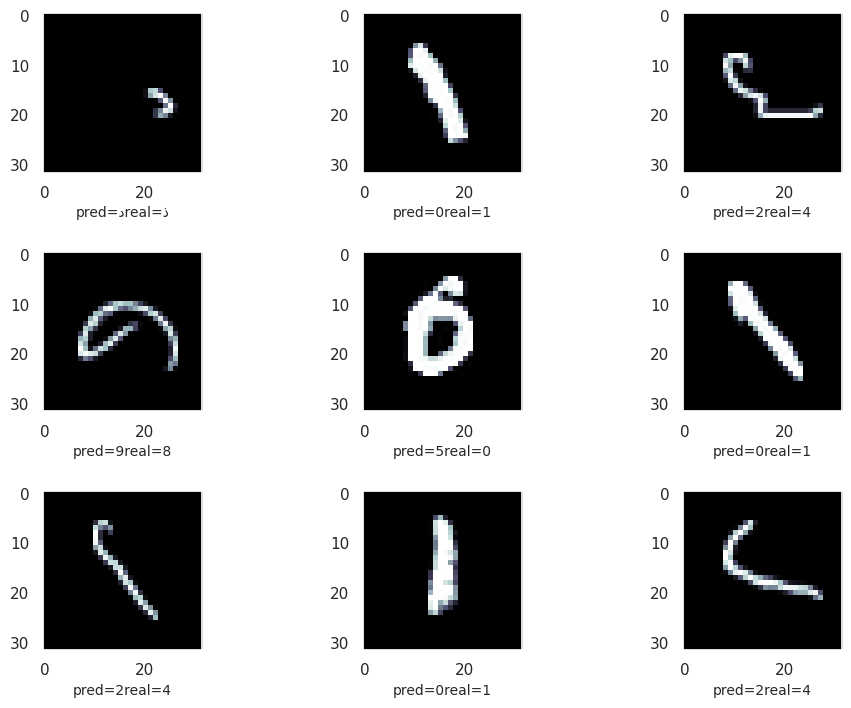

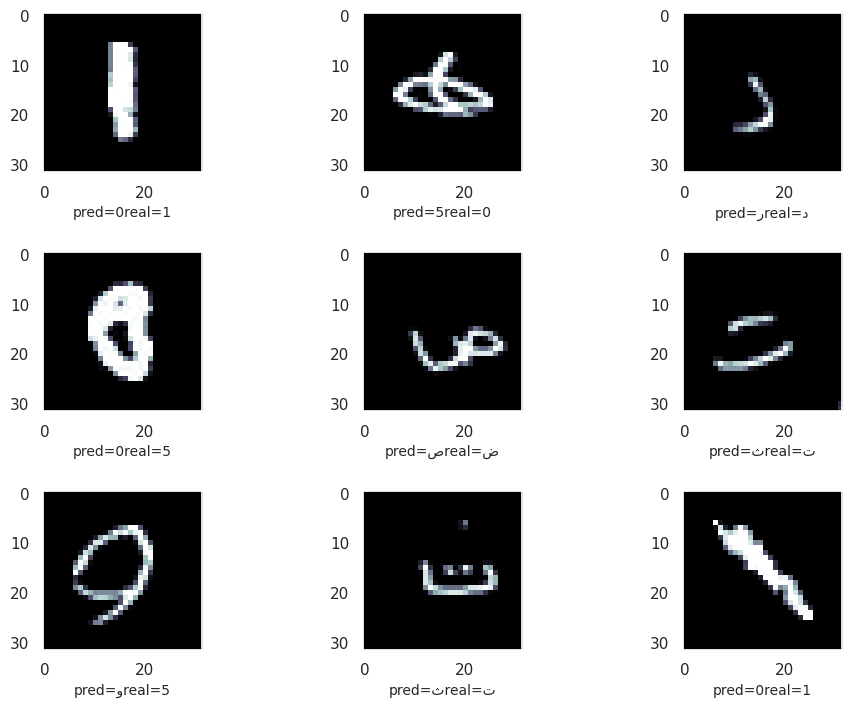

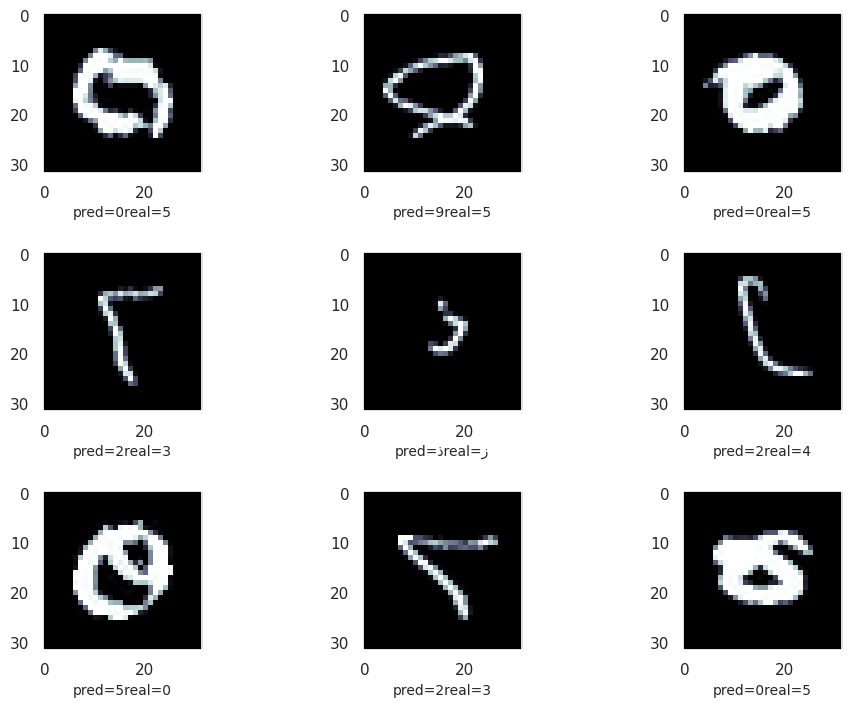

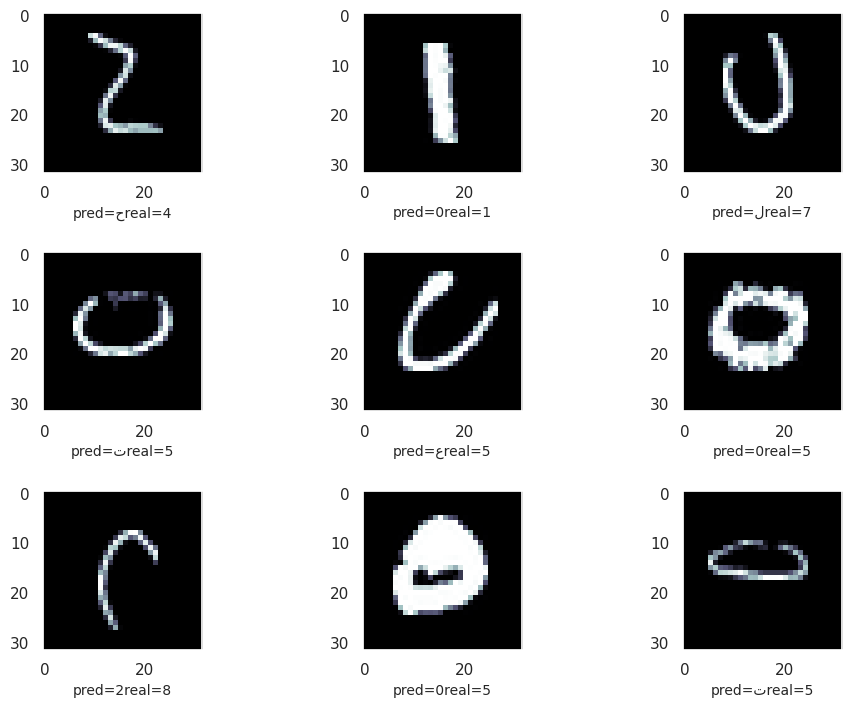

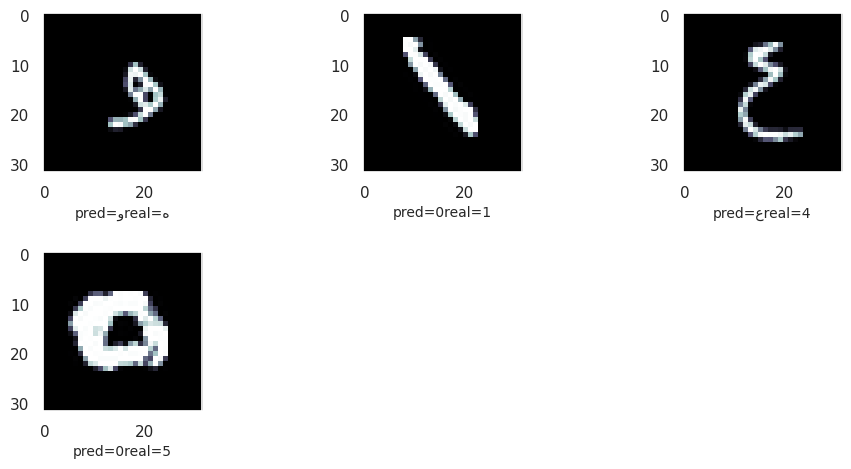

In [82]:
i=0
for wrong_prediction in np.where(predicted_max_prob_model!=real_labels_index_model)[0]:
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[wrong_prediction],cmap='bone')

    plt.xlabel( "pred=" + both_classes[predicted_max_prob_model[wrong_prediction]]+
               "real=" + both_classes[real_labels_index_model[wrong_prediction]],
               fontsize=10,
               ha='center')
    plt.subplots_adjust(hspace=0.5)
    i=i+1
    plt.grid(False)
    if(i==9):
      i=0
      plt.show()